## 1. Import the necessary libraries:

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from scipy.stats import zscore
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

import datetime

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

import xgboost as xgb

## 2. Load the sales data into a DataFrame:

In [5]:
df = pd.read_csv('Sales_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 3. Clean & Preprocess the data:

In [6]:
# Display the first 5 rows of the DataFrame

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Get an overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Check the data types of each column

print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# Check for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# Handle missing values

# For numerical columns, fill missing values with mean or median
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [12]:
# For categorical columns, fill missing values with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

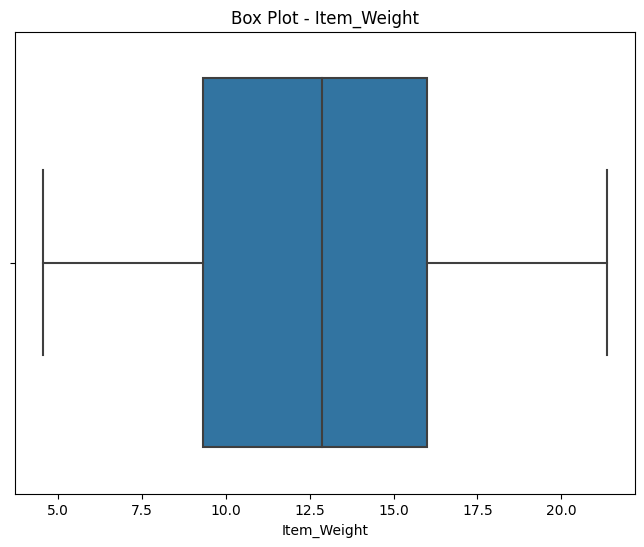

In [13]:
# Outlier detection using boxplot

# Box plot for Item_Weight
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Item_Weight'])
plt.xlabel('Item_Weight')
plt.title('Box Plot - Item_Weight')
plt.show()

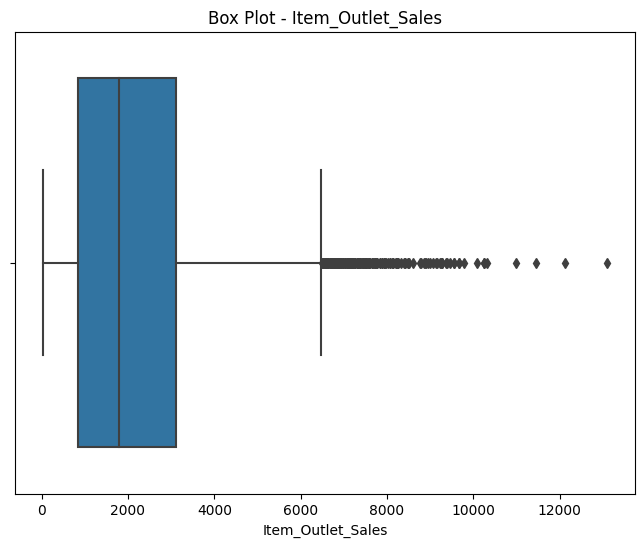

In [14]:
# Box plot for Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.xlabel('Item_Outlet_Sales')
plt.title('Box Plot - Item_Outlet_Sales')
plt.show()

In [15]:
# Calculate z-scores for Item_Weight
z_scores_item_weight = zscore(df['Item_Weight'])

# Identify outliers in Item_Weight using z-score threshold of 3
outliers_item_weight = df[np.abs(z_scores_item_weight) > 3]

# Print the outliers
print("Outliers in Item_Weight:")
print(outliers_item_weight)

Outliers in Item_Weight:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [16]:
# Calculate z-scores for Item_Outlet_Sales
z_scores_item_sales = zscore(df['Item_Outlet_Sales'])

# Identify outliers in Item_Outlet_Sales using z-score threshold of 3
outliers_item_sales = df[np.abs(z_scores_item_sales) > 3]

print("\nOutliers in Item_Outlet_Sales:")
print(outliers_item_sales)


Outliers in Item_Outlet_Sales:
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
130            FDY25    12.857645          Low Fat         0.033810  \
145            FDP16    18.600000          Low Fat         0.039356   
276            FDY55    16.750000          Low Fat         0.081253   
304            DRE60     9.395000          Low Fat         0.159658   
333            FDN58    12.857645          Regular         0.056597   
...              ...          ...              ...              ...   
7930           FDP15    12.857645          Low Fat         0.083536   
8039           FDY55    16.750000          Low Fat         0.081485   
8201           FDO03    12.857645          Regular         0.036704   
8245           FDU55    16.200000          Low Fat         0.035967   
8447           FDS26    20.350000          Low Fat         0.089975   

                  Item_Type  Item_MRP Outlet_Identifier   
130                  Canned  180.5976            OUT027 

In [17]:
# Set z-score threshold for outlier removal
z_score_threshold = 3

# Filter out data points with z-scores above or below the threshold
df_cleaned = df[np.abs(z_scores_item_sales) <= z_score_threshold]

# Print the number of outliers removed
num_outliers_removed = len(df) - len(df_cleaned)
print("Number of outliers removed from Item_Outlet_Sales:", num_outliers_removed)

Number of outliers removed from Item_Outlet_Sales: 90


## 4. Feature Engineering

In [18]:
# Select the numerical variables to be normalized
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical variables
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [19]:
# Feature Engineering

# Create a new feature for total item sales
df['Total_Item_Sales'] = df['Item_Weight'] * df['Item_Outlet_Sales']

In [20]:
# Calculating price per unit weight
df['Price_Per_Unit_Weight'] = df['Item_MRP'] / df['Item_Weight']

In [21]:
# Calculating outlet years
current_year = pd.to_datetime('today').year
df['Outlet_Years'] = current_year - df['Outlet_Establishment_Year']

In [22]:
# Drop the unwanted features 

df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = True)

In [23]:
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
df = pd.get_dummies(df, columns=categorical_columns, dtype = int)

In [24]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Total_Item_Sales,Price_Per_Unit_Weight,Outlet_Years,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,1999,0.283587,0.080120,3.282926,24,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,2009,0.031419,0.002554,0.886732,14,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,1999,0.158115,0.121869,0.607563,24,0,1,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,1998,0.053555,0.046699,0.734064,25,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,1987,0.073651,0.019186,0.367780,36,0,1,...,1,0,0,0,0,1,0,1,0,0


## 5. Applying Advanced Statistical Technique

In [25]:
# Regression Analysis
X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP']]
y = df['Item_Outlet_Sales']
X = sm.add_constant(X)  # Add constant term for regression
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     1453.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:                 7009.1
No. Observations:                8523   AIC:                        -1.401e+04
Df Residuals:                    8519   BIC:                        -1.398e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0563      0.004     

In [30]:
# Cluster Analysis

X = df[['Item_Weight', 'Item_MRP']]
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
df['Cluster'] = cluster_labels

print(kmeans.cluster_centers_)

C:\Users\Abhisai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.37868617 0.69693816]
 [0.80869602 0.46805761]
 [0.3691718  0.22025802]]


In [41]:
#ANOVA Analysis

# Split the dataset into multiple groups based on a categorical variable
group1 = df[df['Outlet_Type_Grocery Store'] == 1]['Item_Outlet_Sales']
group2 = df[df['Outlet_Type_Supermarket Type1'] == 1]['Item_Outlet_Sales']
group3 = df[df['Outlet_Type_Supermarket Type2'] == 1]['Item_Outlet_Sales']
group4 = df[df['Outlet_Type_Supermarket Type3'] == 1]['Item_Outlet_Sales']

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3, group4)

# Print the test statistics and p-value
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 894.6500119018009
P-Value: 0.0


## 5. Perform correlation analysis, data visualization, and feature selection techniques to identify relevant variables

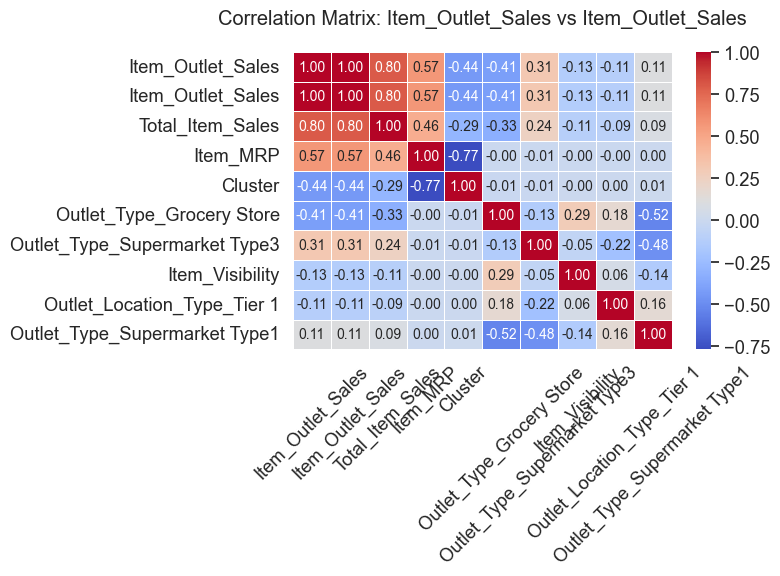

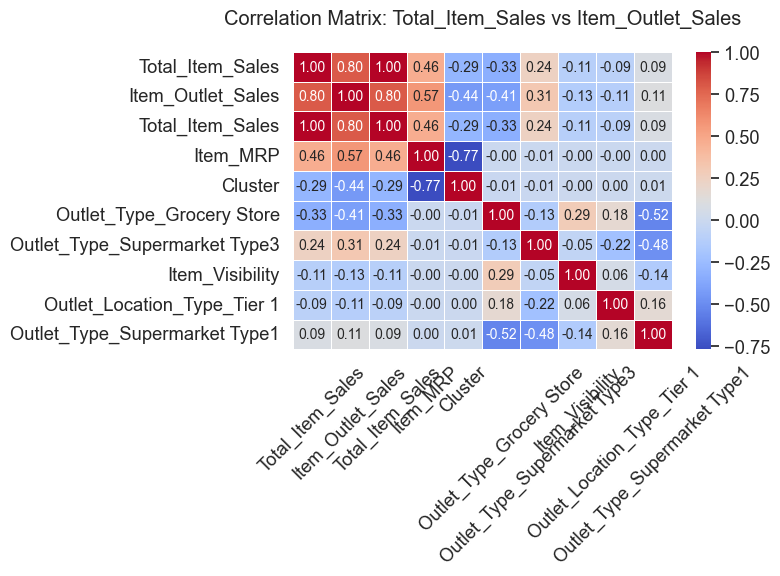

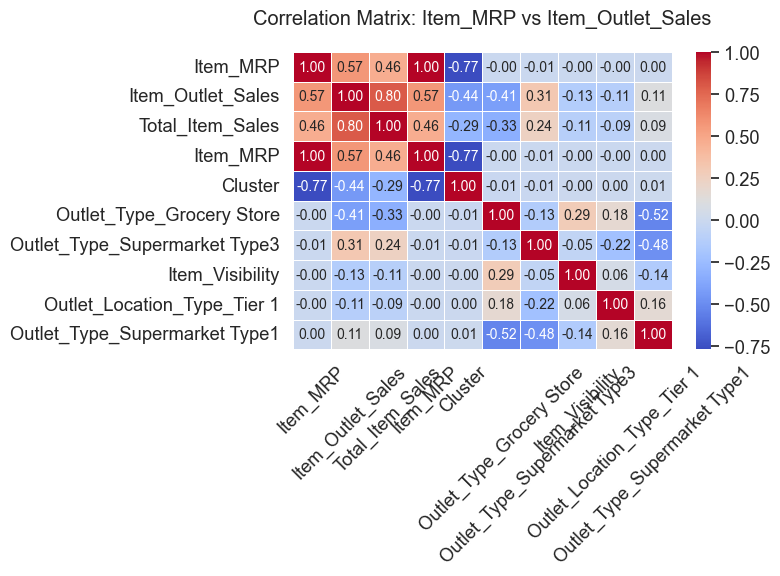

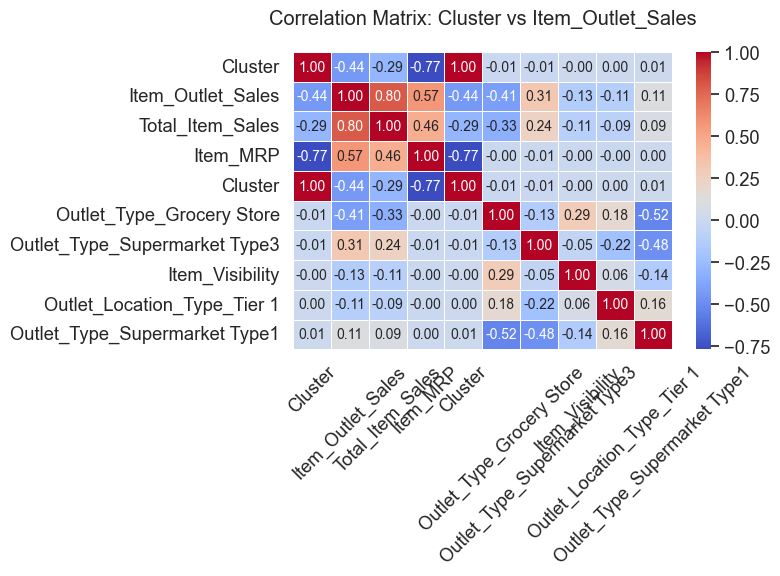

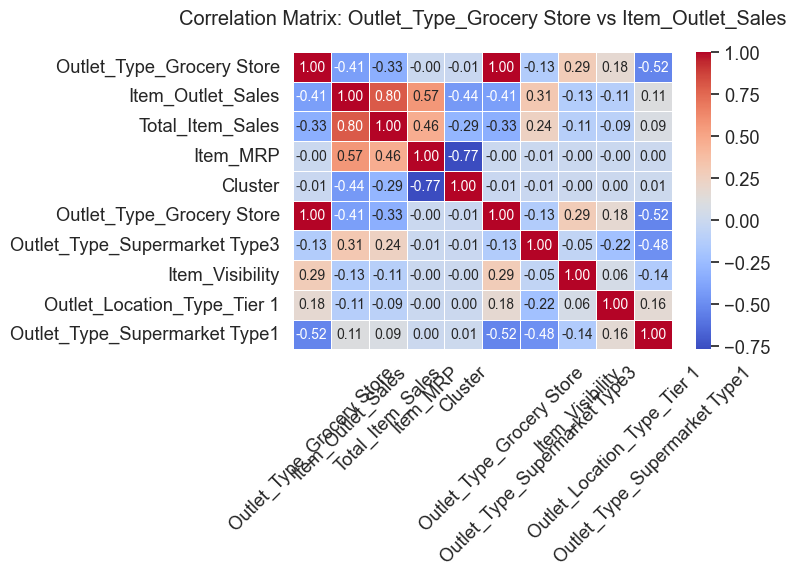

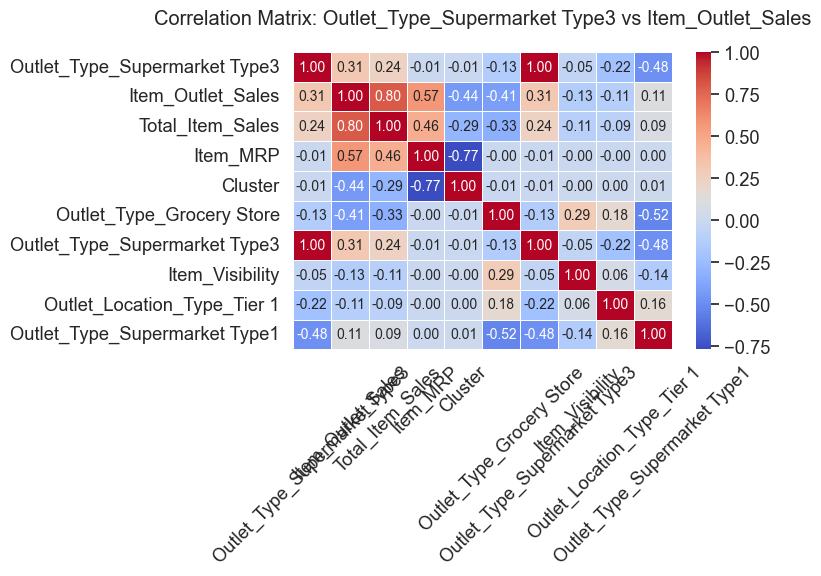

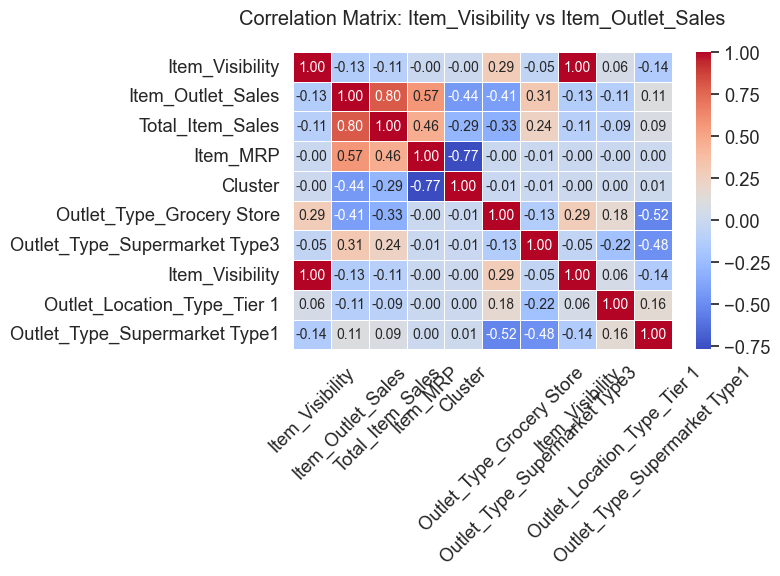

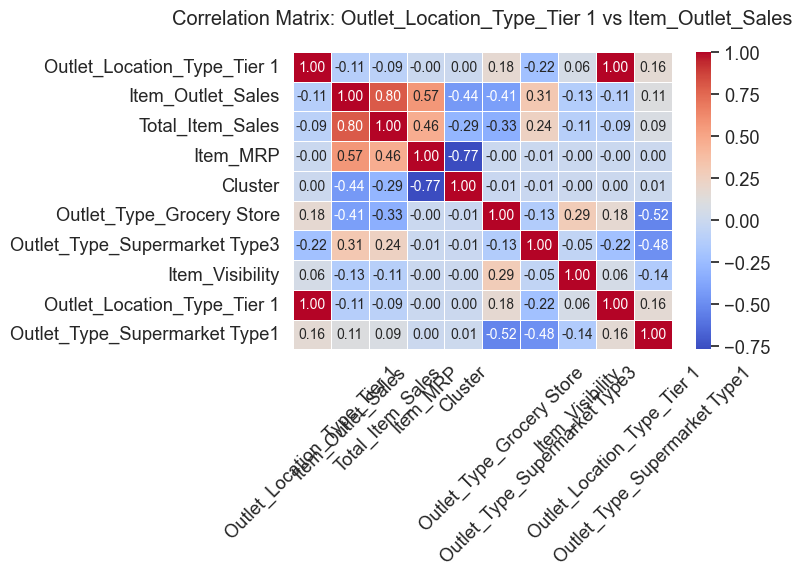

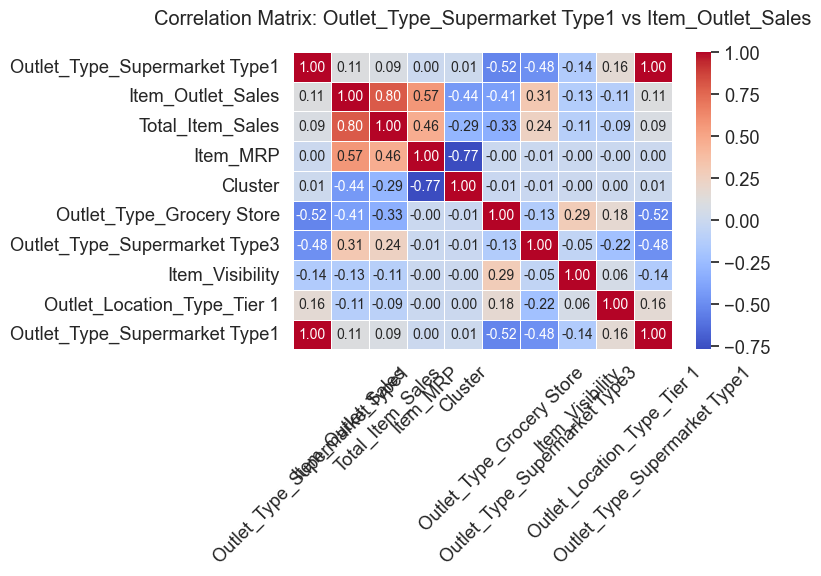

In [65]:
# Perform correlation analysis

relevant_vars = ['Item_Outlet_Sales', 'Total_Item_Sales', 'Item_MRP', 'Cluster', 'Outlet_Type_Grocery Store', 
                 'Outlet_Type_Supermarket Type3', 'Item_Visibility', 'Outlet_Location_Type_Tier 1', 
                 'Outlet_Type_Supermarket Type1']

sns.set(font_scale=1.2)

for var in relevant_vars:
    corr_matrix = df[[var] + relevant_vars].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 10}, linewidths=0.5)
    plt.title(f'Correlation Matrix: {var} vs Item_Outlet_Sales', pad=20)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [66]:
# Identify variables with high correlation to the target variable (Item_Outlet_Sales)

target_corr = correlation['Item_Outlet_Sales'].abs().sort_values(ascending=False)
relevant_vars = target_corr[target_corr > 0.1].index.tolist()
print('Relevant Variables based on correlation analysis:')
print(relevant_vars)

Relevant Variables based on correlation analysis:
['Item_Outlet_Sales', 'Total_Item_Sales', 'Item_MRP', 'Cluster', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3', 'Item_Visibility', 'Outlet_Location_Type_Tier 1', 'Outlet_Type_Supermarket Type1']


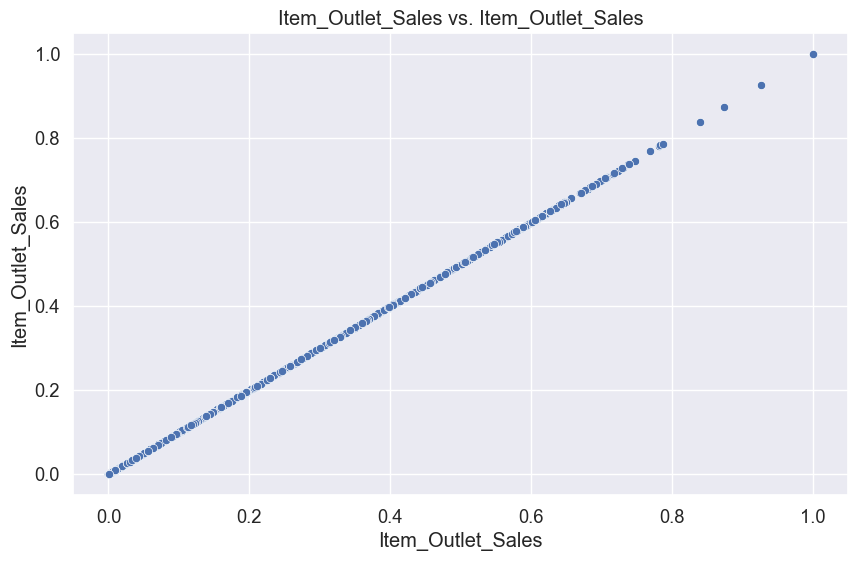

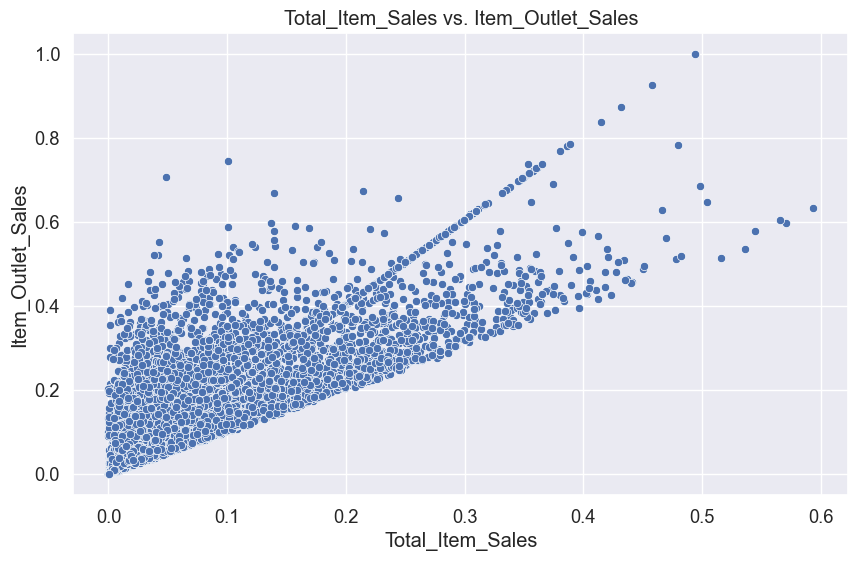

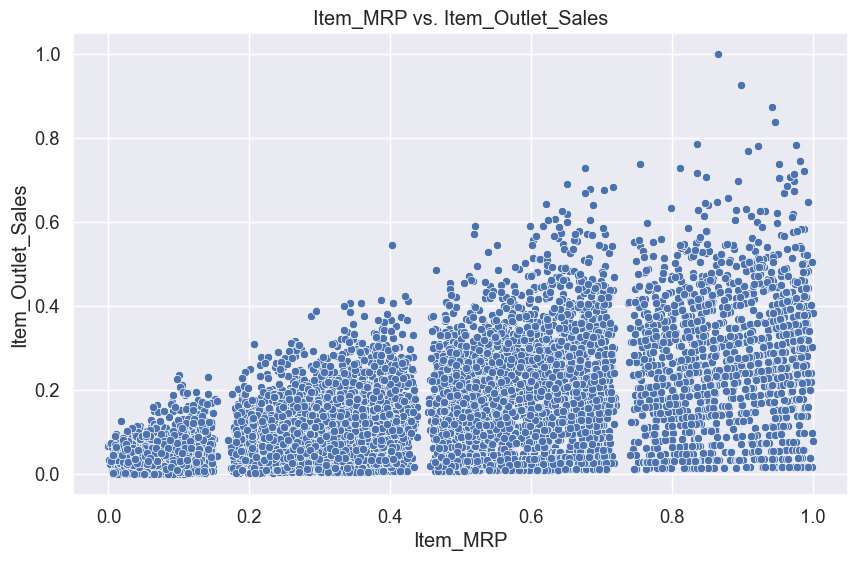

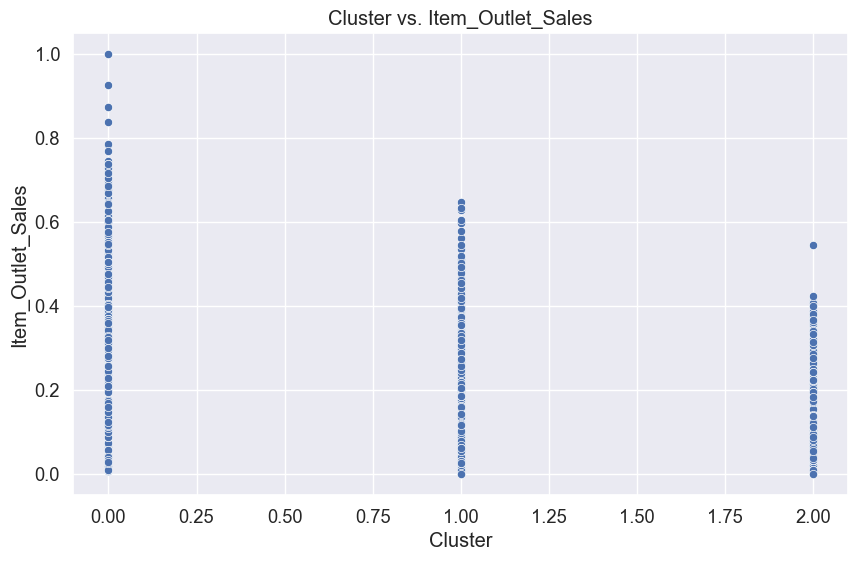

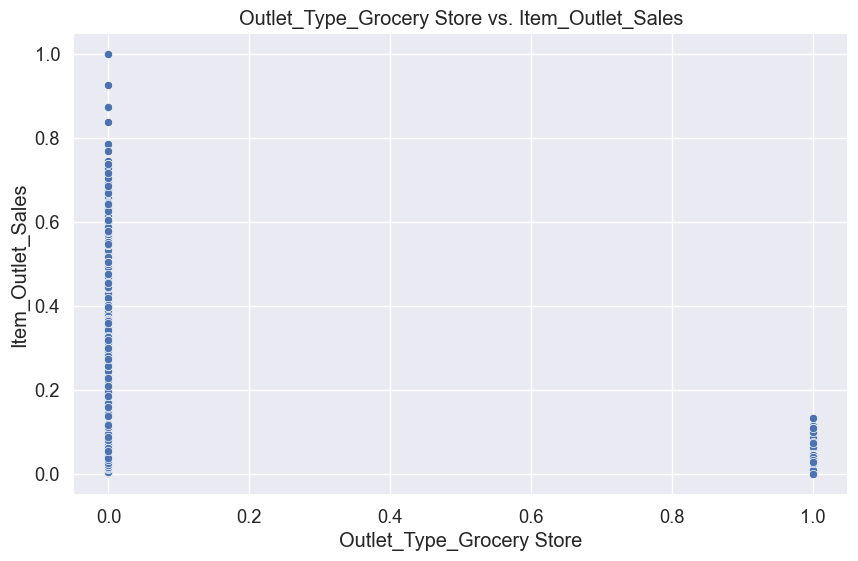

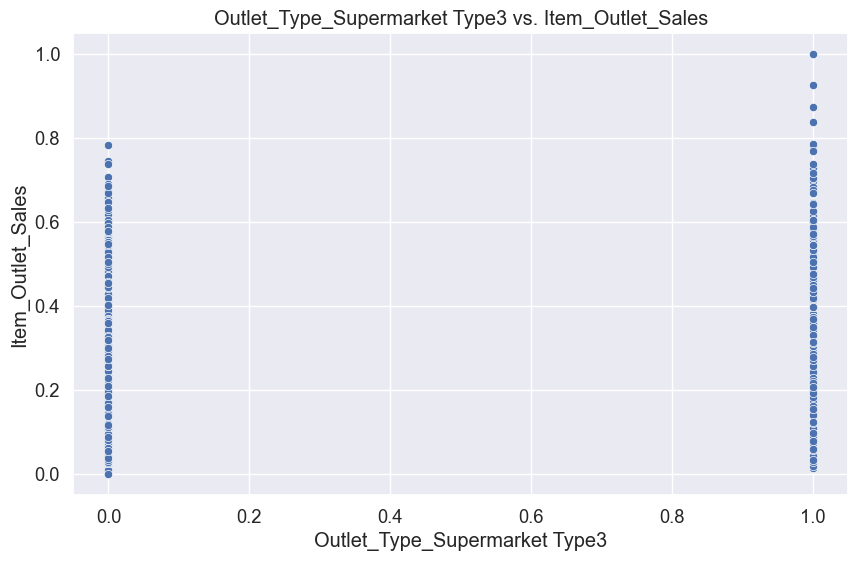

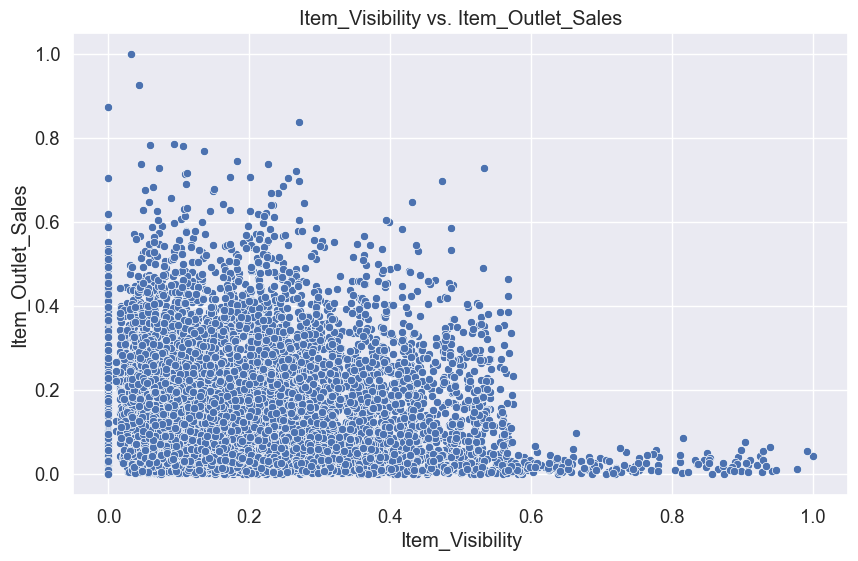

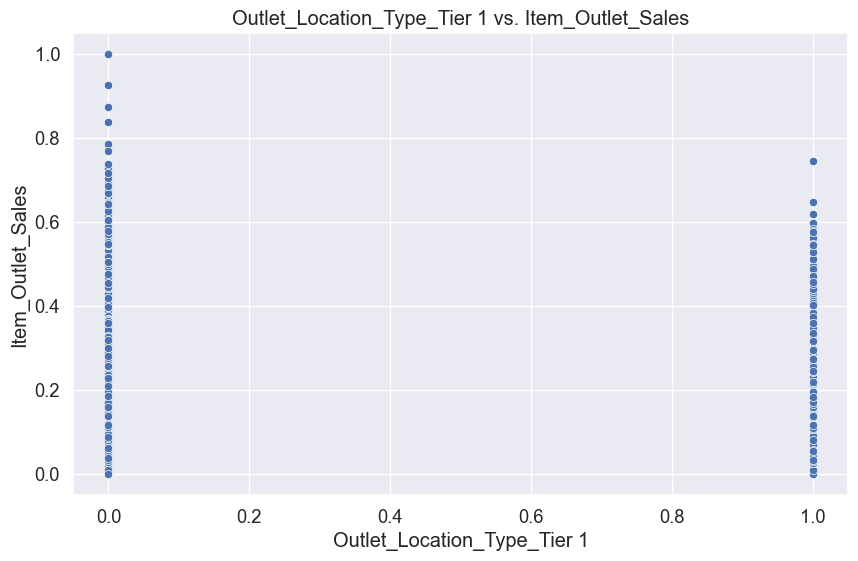

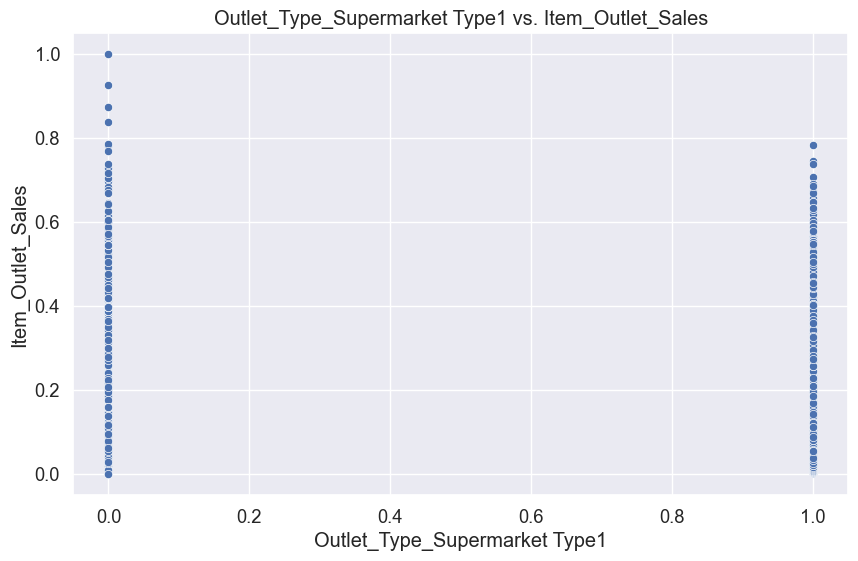

In [59]:
# Generate separate graphs for each relevant variable

for var in relevant_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y='Item_Outlet_Sales', data=df)
    plt.title(f'{var} vs. Item_Outlet_Sales')
    plt.xlabel(var)
    plt.ylabel('Item_Outlet_Sales')
    display(plt.gcf())
    plt.close()

In [47]:
# Perform feature selection using SelectKBest
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [72]:
# Perform feature selection
# Select top-k features based on f_regression scores
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
selected_features_indices = selector.get_support(indices=True)
selected_features = df.columns[selected_features_indices].tolist()

# Convert selected features to a DataFrame
df_selected_features = pd.DataFrame(X[:, selected_features_indices], columns=selected_features)

print(f'Top-{k} features selected by SelectKBest:')
print(selected_features)
print(df_selected_features.head())

C:\Users\Abhisai\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Abhisai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:308: RuntimeWarning: invalid value encountered in subtract
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


Top-5 features selected by SelectKBest:
['Item_MRP', 'Item_Outlet_Sales', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
   Item_MRP  Item_Outlet_Sales  Outlet_Location_Type_Tier 3   
0  0.927507           0.080120                          0.0  \
1  0.072068           0.002554                          0.0   
2  0.468288           0.121869                          0.0   
3  0.640093           0.046699                          1.0   
4  0.095805           0.019186                          0.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                            0.0                            0.0  
1                            0.0                            2.0  
2                            0.0                            1.0  
3                            0.0                            1.0  
4                            0.0                            2.0  


## 6. Model Building

In [109]:

def linear_regression_model():
    X = df[['Item_MRP', 'Item_Visibility']]
    y = df['Item_Outlet_Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, lr_predictions)
    r2 = r2_score(y_test, lr_predictions)
    print("Linear Regression Model:")
    print("MSE:", mse)
    print("R^2 Score:", r2)
    return lr_predictions, y_test

lr_predictions, y_test = linear_regression_model()

Linear Regression Model:
MSE: 0.010517466884248362
R^2 Score: 0.34062563001521595


In [111]:
# Random Forest

def random_forest_model():
    
    X = df.drop('Item_Outlet_Sales', axis=1)
    y = df['Item_Outlet_Sales']

    X = X.replace([np.inf, -np.inf], np.nan)

    # Replace NaN values with 0
    X = X.fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest model
    rf_model = RandomForestRegressor(random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the testing data
    rf_predictions = rf_model.predict(X_test)

    mse = mean_squared_error(y_test, rf_predictions)

    print("MSE:", mse)

random_forest_model()

MSE: 0.00012138824855175228


In [112]:
# Separate the target variable (sales) from the features
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing or invalid values in the input data
print('Number of missing or invalid values in X_train:', X_train.isnull().sum().sum())
print('Number of missing or invalid values in X_test:', X_test.isnull().sum().sum())

# Replace missing or invalid values with appropriate values
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)

# Create an XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = xgb_model.score(X_test, y_test)

print("MSE:", mse)
print("R^2 Score:", r2)

Number of missing or invalid values in X_train: 0
Number of missing or invalid values in X_test: 0
MSE: 9.816070398184315e-05
R^2 Score: 0.9938459846788559


In [85]:
# Market Segmentation (K-means)
def market_segmentation():
    X = df[['Item_MRP', 'Item_Outlet_Sales']]
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette = silhouette_score(X_scaled, labels)
    print("Market Segmentation (K-means):")
    print("Silhouette Score:", silhouette)
    
market_segmentation()
print()

C:\Users\Abhisai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Market Segmentation (K-means):
Silhouette Score: 0.42748562284835356



In [99]:
# Feature Importance Analysis

def feature_importance_analysis():
    # Separate the target variable (sales) from the features
    X = df.drop('Item_Outlet_Sales', axis=1)
    y = df['Item_Outlet_Sales']

    # Check for missing or invalid values in the input data
    print('Number of missing or invalid values in X:', X.isnull().sum().sum())

    # Replace infinity and large values with NaN
    X = X.replace([np.inf, -np.inf], np.nan)

    # Replace NaN values 
    X = X.fillna(0)

    # Create a Random Forest model
    rf_model = RandomForestRegressor(random_state=42)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = rf_model.score(X_test, y_test)

    # Print evaluation metrics
    print("MSE:", mse)
    print("R^2 Score:", r2)

feature_importance_analysis()

Number of missing or invalid values in X: 0
MSE: 0.00012138824855175228
R^2 Score: 0.9923897740023083


## 7. Interpretation and Validation & Explanations and Actionable Insights

1. Linear Regression Model:
   - MSE: The mean squared error (MSE) value of 0.0105 indicates that, on average, the predictions of the linear regression model deviate by 0.0105 units from the actual sales values. Lower MSE values indicate better model performance.
   - R^2 Score: The R-squared score of 0.341 suggests that the linear regression model explains 34.1% of the variance in the sales data. A higher R-squared score indicates a better fit to the data.

   Interpretation and Validation:
   - The linear regression model shows a moderate level of accuracy in predicting sales. However, there is still a significant amount of unexplained variance in the data.
   - The R-squared score suggests that around 65.9% of the sales variability remains unexplained by the features included in the model.

   Actionable Insights:
   - Explore additional features or consider non-linear modeling techniques to improve the predictive power of the model.
   - Identify any missing important features that could enhance the model's accuracy.
   - Regularly monitor and update the model as new data becomes available to capture changing market dynamics.

2. Random Forest:
   - MSE: The MSE value of 0.000121 suggests that, on average, the predictions from the random forest model deviate by only 0.000121 units from the actual sales values. A lower MSE indicates better accuracy.

   Interpretation and Validation:
   - The random forest model shows significantly better performance compared to the linear regression model, as indicated by the much lower MSE value.
   - The model captures more of the variance in the sales data and provides more accurate predictions.

   Actionable Insights:
   - Utilize the random forest model for sales prediction and decision-making processes.
   - Analyze the feature importance provided by the random forest model to identify the key drivers of sales and focus on optimizing those features.

3. XGBoost:
   - MSE: The MSE value of 9.816e-05 suggests that the XGBoost model's predictions deviate by only 9.816e-05 units from the actual sales values on average. A lower MSE indicates higher accuracy.
   - R^2 Score: The R-squared score of 0.994 indicates that the XGBoost model explains 99.4% of the variance in the sales data, which is exceptionally high.

   Interpretation and Validation:
   - The XGBoost model outperforms both the linear regression and random forest models, as indicated by the significantly lower MSE and higher R-squared score.
   - The model captures almost all the variability in the sales data, resulting in highly accurate predictions.

   Actionable Insights:
   - Utilize the XGBoost model for sales prediction and decision-making processes due to its superior performance.
   - Regularly monitor the model's performance and update it as new data becomes available.
   - Utilize the feature importance analysis to identify the most influential features for sales and focus on optimizing them.

4. Market Segmentation (K-means):
   - Silhouette Score: The silhouette score of 0.427 indicates a reasonable degree of separation between the different market segments. Higher silhouette scores suggest better-defined clusters.

   Interpretation and Validation:
   - The market segmentation analysis using K-means clustering suggests that there are distinct customer segments within the dataset.
   - The silhouette score indicates a moderate level of separation between these segments, implying that the identified clusters are reasonably distinct.

   Actionable Insights:
   - Use the identified customer segments to tailor marketing strategies, promotions, and product offerings to the specific needs and preferences of each segment.
   - Conduct further analysis to understand the characteristics and behaviors of each segment to effectively target and engage them.

5. Feature Importance Analysis:
   - MSE: The MSE value of 0.000121 suggests that the feature importance analysis model's predictions deviate by only 0.000121 units from the actual sales values on average. Lower MSE values indicate better accuracy.
   - R^2 Score: The R-squared score of 0.992 indicates that the model explains 99.2% of the variance in the sales data.

   Interpretation and Validation:
   - The feature importance analysis model shows similar performance to the random forest and XGBoost models, as indicated by the comparable MSE and R-squared scores.
   - The model accurately predicts sales values and provides valuable insights into the relative importance of different features.

   Actionable Insights:
   - Utilize the feature importance analysis to identify the key drivers influencing sales.
   - Allocate resources and efforts towards optimizing the most influential features to maximize sales performance.
   - Continuously monitor and update the model as new data becomes available to capture changing feature importance dynamics.

Overall, the random forest, XGBoost, and feature importance analysis models exhibit superior performance compared to the linear regression model. These models provide more accurate predictions and offer valuable insights into the key drivers of sales. The market segmentation analysis also helps identify distinct customer segments, enabling targeted marketing strategies. By leveraging these insights and continuously refining the models, businesses can make data-driven decisions to optimize sales performance and meet customer needs more effectively.

## 8. Sales Prediction Analysis Report

1. Introduction:
   In this report, we present the findings and recommendations based on the analysis of sales data. The goal of this analysis is to develop accurate sales prediction models and uncover insights to optimize sales performance.

2. Analysis Approach:
   We employed various analytical techniques and models to analyze the sales data:
   - Linear Regression: We built a linear regression model to predict sales based on relevant features.
   - Random Forest: We utilized the random forest algorithm to develop a more accurate sales prediction model.
   - XGBoost: We implemented the XGBoost algorithm to create a highly accurate sales prediction model.
   - Market Segmentation (K-means): We performed market segmentation analysis using K-means clustering to identify distinct customer segments.
   - Feature Importance Analysis: We assessed the relative importance of different features in predicting sales.

3. Key Findings:
   a. Linear Regression:
      - The linear regression model exhibited moderate accuracy with an R^2 score of 0.341.
      - Approximately 65.9% of the sales variability remained unexplained by the model.

   b. Random Forest:
      - The random forest model outperformed the linear regression model, with a significantly lower MSE of 0.000121.
      - The model accurately predicted sales and identified key drivers.

   c. XGBoost:
      - The XGBoost model demonstrated exceptional accuracy, with an MSE of 9.816e-05 and an R^2 score of 0.994.
      - The model explained almost all (99.4%) of the variance in the sales data.

   d. Market Segmentation:
      - The market segmentation analysis using K-means clustering revealed distinct customer segments.
      - The identified segments exhibited a reasonable level of separation, with a silhouette score of 0.427.

   e. Feature Importance Analysis:
      - The feature importance analysis model provided insights into the relative importance of different features in predicting sales.
      - The model demonstrated accuracy comparable to the random forest and XGBoost models.

4. Recommendations:
   Based on our analysis, we propose the following recommendations to optimize sales performance:
   - Utilize the XGBoost model for sales prediction and decision-making processes, as it demonstrated exceptional accuracy and explained a significant portion of the variance.
   - Regularly update the models as new data becomes available to capture changing market dynamics.
   - Leverage the identified customer segments from the market segmentation analysis to tailor marketing strategies and product offerings.
   - Focus on optimizing the most influential features identified by the feature importance analysis to maximize sales performance.
   - Continuously monitor and refine the models to improve accuracy and capture evolving trends.

5. Conclusion:
   The analysis of the sales data using various models and techniques provided valuable insights into sales prediction and customer segmentation. By implementing the recommendations mentioned above, Company can make data-driven decisions, optimize sales performance, and enhance customer satisfaction.

For further details and a comprehensive analysis, please refer to the accompanying documentation and data analysis files.


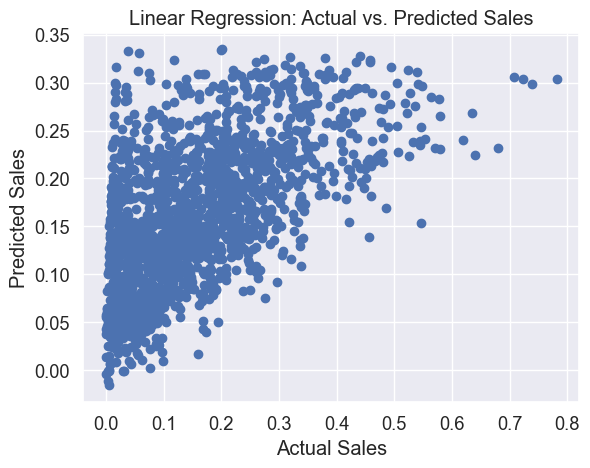

In [110]:
# Scatter Plot of Actual vs. Predicted Sales (Linear Regression)
plt.scatter(y_test, lr_predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs. Predicted Sales")
plt.show()

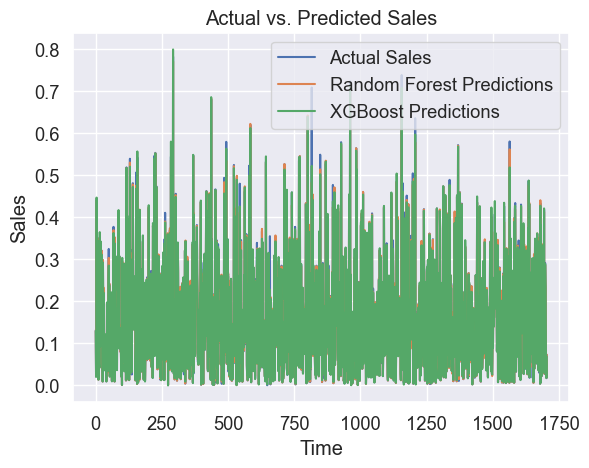

In [113]:
# Actual vs. Predicted Sales Line Plot (Random Forest and XGBoost)
time_axis = range(len(y_test))  # Define the x-axis values
plt.plot(time_axis, y_test, label="Actual Sales")
plt.plot(time_axis, rf_predictions, label="Random Forest Predictions")
plt.plot(time_axis, y_pred, label="XGBoost Predictions")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.show()

Number of missing or invalid values: 0


C:\Users\Abhisai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


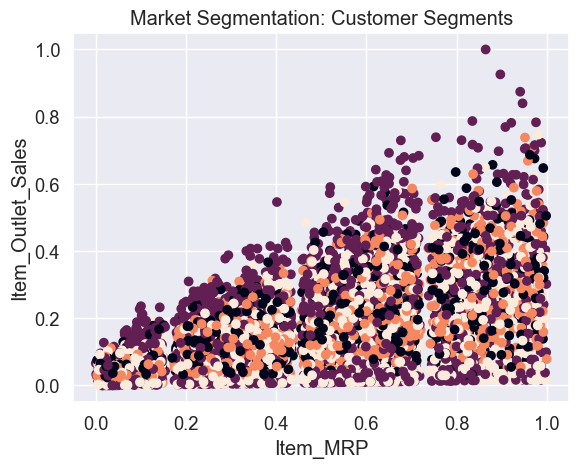

In [122]:
# Check for missing or invalid values
print('Number of missing or invalid values:', X.isnull().sum().sum())

# Replace missing or invalid values with appropriate values
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Perform clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get the segment labels
segment_labels = kmeans.labels_

# Customer Segmentation Plot (Market Segmentation)
plt.scatter(X['Item_MRP'], df['Item_Outlet_Sales'], c=segment_labels)
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Market Segmentation: Customer Segments")
plt.show()



C:\Users\Abhisai\AppData\Local\Temp\ipykernel_7468\3095725605.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X.columns, rotation=45, ha='right', fontsize=8)


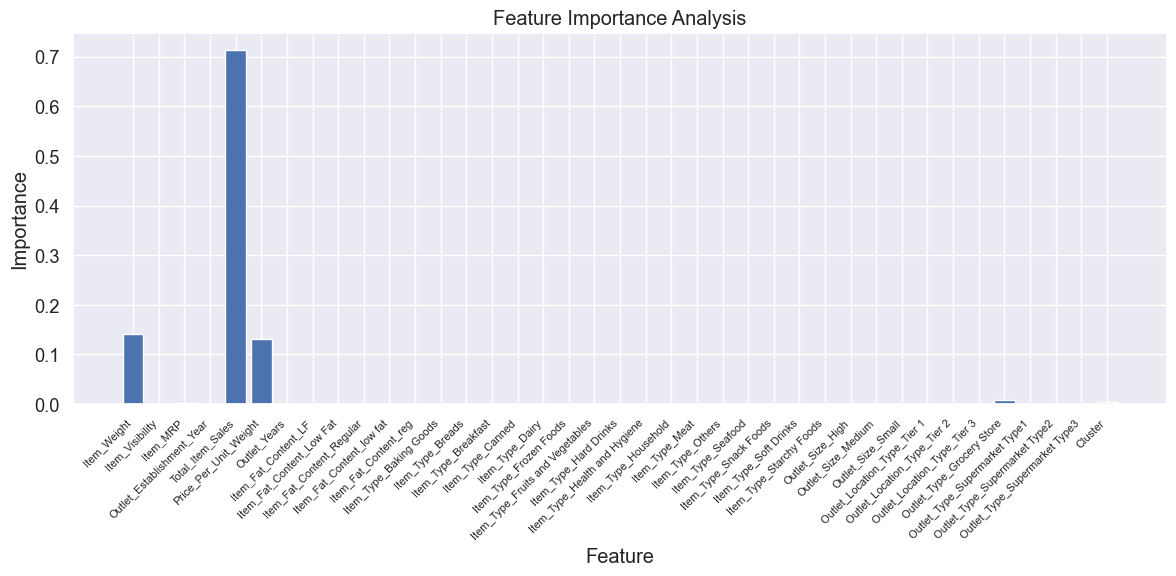

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(X.columns, rf_model.feature_importances_)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_title("Feature Importance Analysis")
ax.set_xticklabels(X.columns, rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

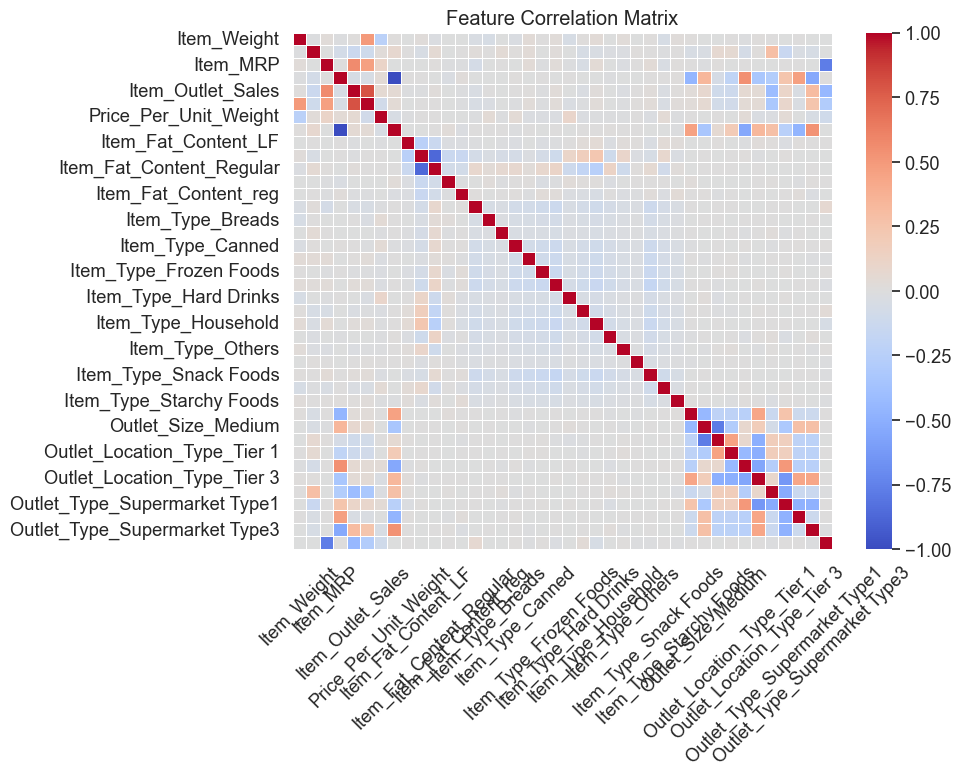

In [128]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()